In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import os

path = os.listdir('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\training\\')
classes = {'by_arch': 0, 'rom_arch':1}

In [3]:
import cv2
X =[]
Y =[]

for cls in classes:
    pth = 'C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\training\\' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (512, 512))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
X.shape

(304, 512, 512)

In [7]:
X_update = X.reshape(len(X), -1)
X_update.shape

(304, 262144)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X_update, Y, random_state=10, test_size = 0.20)

In [9]:
xtrain.shape, xtest.shape

((243, 262144), (61, 262144))

In [10]:
# Feature Scaling

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Model Training

In [11]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [12]:
print("Training Score: ", sv.score(xtrain, ytrain))
print("Testing Score: ", sv.score(xtest, ytest))

Training Score:  0.9588477366255144
Testing Score:  0.6065573770491803


Prediction

In [13]:
pred = sv.predict(xtest)
np.where(ytest!=pred)

(array([ 0,  4,  6,  7, 11, 13, 14, 17, 18, 20, 21, 22, 26, 29, 30, 35, 41,
        46, 47, 52, 53, 55, 56, 60], dtype=int64),)

In [20]:
pred[3]

0

In [21]:
ytest[3]

0

Model Testing

In [22]:
dec = {0: 'Byzentine Architecture', 1: 'Roman Architecture'}

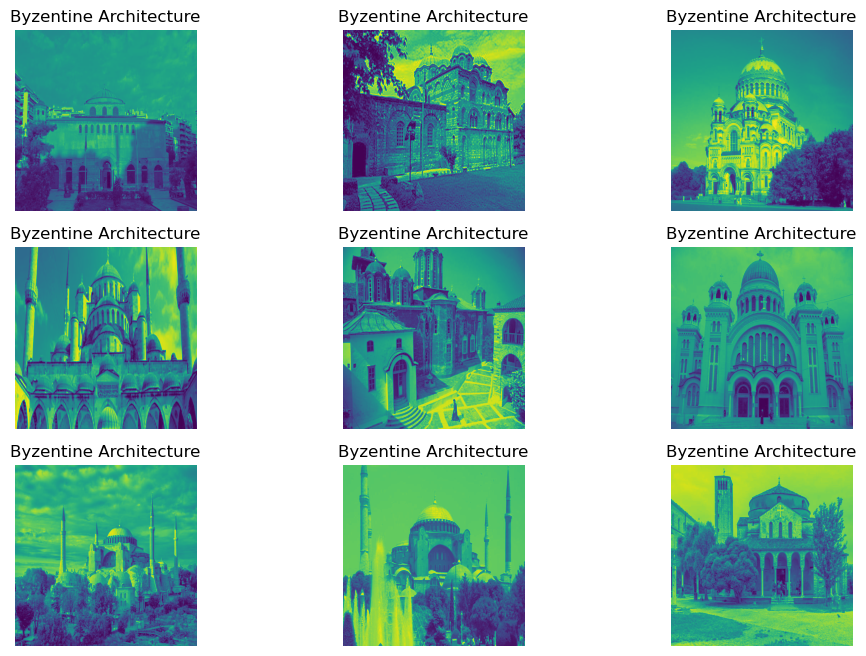

In [31]:
plt.figure(figsize=(12,8))
testPath = os.listdir('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\testing\\')
c = 1
for i in os.listdir('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\testing\\by_arch\\')[:9]:
    plt.subplot(3,3,c)
    
    image = cv2.imread('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\testing\\by_arch\\'+i,0)
    imageRe = cv2.resize(image, (512, 512))
    imageRe = imageRe.reshape(1, -1)/255
    
    testPath = sv.predict(imageRe)
    
    plt.title(dec[p[0]])
    plt.imshow(image)
    plt.axis('off')
    
    c+=1

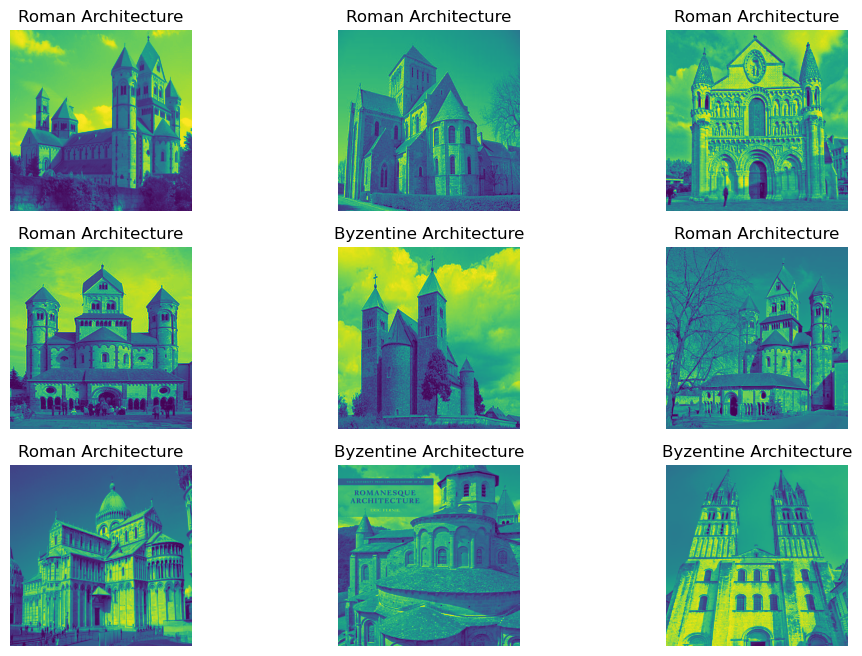

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\testing\\')
c = 1
for i in os.listdir('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\testing\\rom_arch\\')[:9]:
    plt.subplot(3,3,c)
    
    image = cv2.imread('C:\\NITD\\Mtech-1stSem\\Soft Computing\\assignment\\Data\\ResizedData\\testing\\rom_arch\\'+i,0)
    imageRe = cv2.resize(image, (512, 512))
    imageRe = imageRe.reshape(1, -1)/255
    
    p = sv.predict(imageRe)
    
    plt.title(dec[p[0]])
    plt.imshow(image)
    plt.axis('off')
    
    c+=1